In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


正確答案:  8


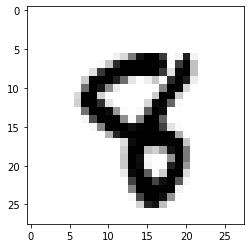

In [8]:
n = 34567
plt.imshow(x_train[n], cmap = 'Greys')
print("正確答案: ", y_train[n])

In [9]:
x_train = x_train/100
x_test = x_test/100

In [10]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(60000,784)*100/255

In [15]:
x_test = x_test.reshape(10000,784)*100/255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train, 10)

In [20]:
y_test = to_categorical(y_test, 10)

In [21]:
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [24]:
model = Sequential()

In [25]:
model.add(Dense(100, input_dim = 784, activation = 'relu'))

In [26]:
model.add(Dense(100, activation = 'relu'))

In [27]:
model.add(Dense(10, activation = 'softmax'))

In [28]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.087), metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0827 - accuracy: 0.3507
Epoch 2/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0490 - accuracy: 0.7309
Epoch 3/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0276 - accuracy: 0.8463
Epoch 4/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0211 - accuracy: 0.8759
Epoch 5/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0183 - accuracy: 0.8894
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0166 - accuracy: 0.8966
Epoch 7/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0155 - accuracy: 0.9034
Epoch 8/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0147 - accuracy: 0.9072
Epoch 9/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0140 - accuracy: 0.9116
Epoch 10/20
6

In [31]:
result = model.predict_classes(x_test)

神經網路預測:  7


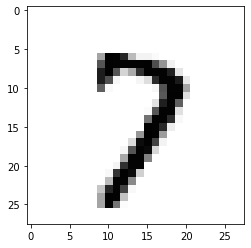

In [36]:
n = 5154
print('神經網路預測: ', result[n])
plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys')